In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df= pd.read_csv('Spam1.csv')

In [51]:
df

,Category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

## Data Cleaning 

In [5]:
df.isnull().sum()

Category    0
message     0
dtype: int64

In [6]:
df.duplicated().sum()

415

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.shape

(5157, 2)

## EDA

In [9]:
import matplotlib.pyplot as plt

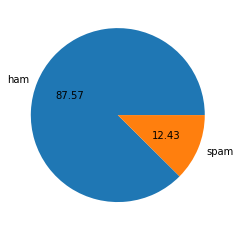

In [10]:
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Roshan
[nltk_data]     Bhatia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
!pip install nltk

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Roshan
[nltk_data]     Bhatia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['Category'] = encoder.fit_transform(df['Category'])

In [16]:
df.head()

,Category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_characters'] = df['message'].apply(len)
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [18]:
df.head()

,Category,message,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [19]:

df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.024627,18.560016,1.965290
std,58.292789,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# for ham
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.778787,17.267272,1.822852
std,56.589126,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#for spam
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [22]:
import seaborn as sns

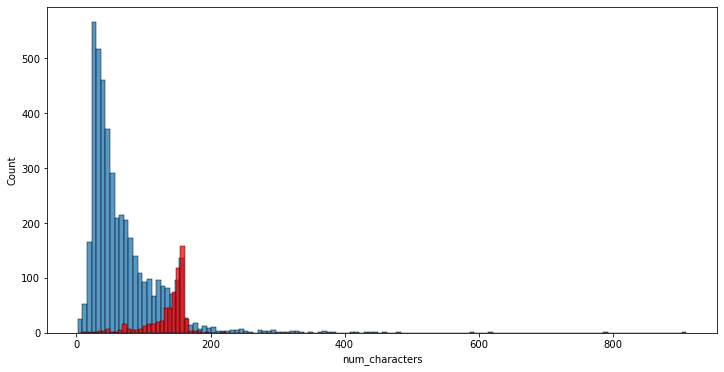

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')

# Data preprocessing

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [25]:
df['message'][34]

'Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged'

In [26]:
transform_text("Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged")


'thank subscript rington uk mobil charg pleas confirm repli ye repli charg'

In [27]:
df['transformed_message'] = df['message'].apply(transform_text)

In [28]:
df.head()

,Category,message,num_words,num_characters,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [29]:
ham_corpus = []
for msg in df[df['message'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [30]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# MODEL BUILDING

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [32]:
X = tfidf.fit_transform(df['transformed_message']).toarray()


In [33]:
X.shape

(5157, 3000)

In [34]:
y = df['Category'].values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [37]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [38]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [39]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8643410852713178
[[1169  182]
 [  28  169]]
0.48148148148148145


In [40]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[1351    0]
 [  45  152]]
1.0


In [41]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9786821705426356
[[1347    4]
 [  29  168]]
0.9767441860465116


In [42]:
clfs = {
 
    'NB': mnb
}

In [43]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [44]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [45]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))